In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Dataset Details
This is a dataset that tracks the sources of emission, types of emission, and total emissions (CH4, N2O, CO2, etc.) per country from 2000 to 2020. The primary data source used was the United Nations's Food and Agriculture Organization (FAO) website, which publishes tabular data pertaining to global environmental issues. Considering the meticulous documentation of government statistics by such a legally constituted IGO, no other authority is more equipped to provide insight on emission rates.

The dataset (in .csv format) contains 58765 rows and 25 columns.

Dataset was created on March 2nd, 2023.

## Imports
I am using a typical data science stack: `numpy`, `pandas`, `sklearn`, `matplotlib`.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
import datetime

import os
print(os.listdir("../input"))

['.ipynb_checkpoints', 'total-emissions-per-country-2000-2020', 'total-emissions-per-country-code-starter.ipynb']


## Overview
Let's take a quick look at what the data looks like:

### Total Emissions (Kilotonnes), Afghanistan

In [3]:
data = pd.read_csv('total-emissions-per-country-2000-2020/Total Emissions Per Country (2000-2020).csv')
data.head(224)

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.5200,0.5267,0.8200,0.9988,0.8225,1.1821,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.1170,0.1185,0.1845,0.2247,0.1851,0.2660,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.6370,0.6452,1.0045,1.2235,1.0075,1.4481,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Afghanistan,All sectors without LULUCF,Emissions (N2O),kilotonnes,11.6453,10.2895,11.9045,12.3870,12.3179,12.8563,...,16.3091,16.3303,16.3723,17.3372,17.2410,17.0810,17.9014,15.9129,15.9893,16.7350
220,Afghanistan,All sectors without LULUCF,Emissions (CO2),kilotonnes,914.0000,945.0000,1226.0000,1357.0000,1066.0000,1489.0000,...,12390.0000,10564.0000,8801.0000,8100.0000,8184.0000,7040.0000,8201.0000,8686.0000,9476.0000,9438.0000
221,Afghanistan,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,11734.3967,10395.4910,12541.1191,12982.6335,13042.5729,13380.3087,...,18265.2421,18151.5956,18168.9210,18579.3400,17768.1663,17622.9015,17483.1518,17801.7414,17864.3197,18557.4042
222,Afghanistan,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,3085.9962,2726.7051,3154.6895,3282.5460,3264.2390,3406.9135,...,4321.9101,4327.5425,4338.6538,4594.3471,4568.8560,4526.4582,4743.8673,4216.9232,4237.1545,4434.7812


In [6]:
data.columns

Index(['Area', 'Item', 'Element', 'Unit', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [4]:
data.shape

(58765, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58765 entries, 0 to 58764
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     58765 non-null  object 
 1   Item     58765 non-null  object 
 2   Element  58765 non-null  object 
 3   Unit     58765 non-null  object 
 4   2000     55577 non-null  float64
 5   2001     54038 non-null  float64
 6   2002     54137 non-null  float64
 7   2003     54158 non-null  float64
 8   2004     54163 non-null  float64
 9   2005     54431 non-null  float64
 10  2006     54473 non-null  float64
 11  2007     54315 non-null  float64
 12  2008     54296 non-null  float64
 13  2009     54283 non-null  float64
 14  2010     54714 non-null  float64
 15  2011     54136 non-null  float64
 16  2012     54614 non-null  float64
 17  2013     54501 non-null  float64
 18  2014     54379 non-null  float64
 19  2015     54289 non-null  float64
 20  2016     54252 non-null  float64
 21  2017     540

Plot 1

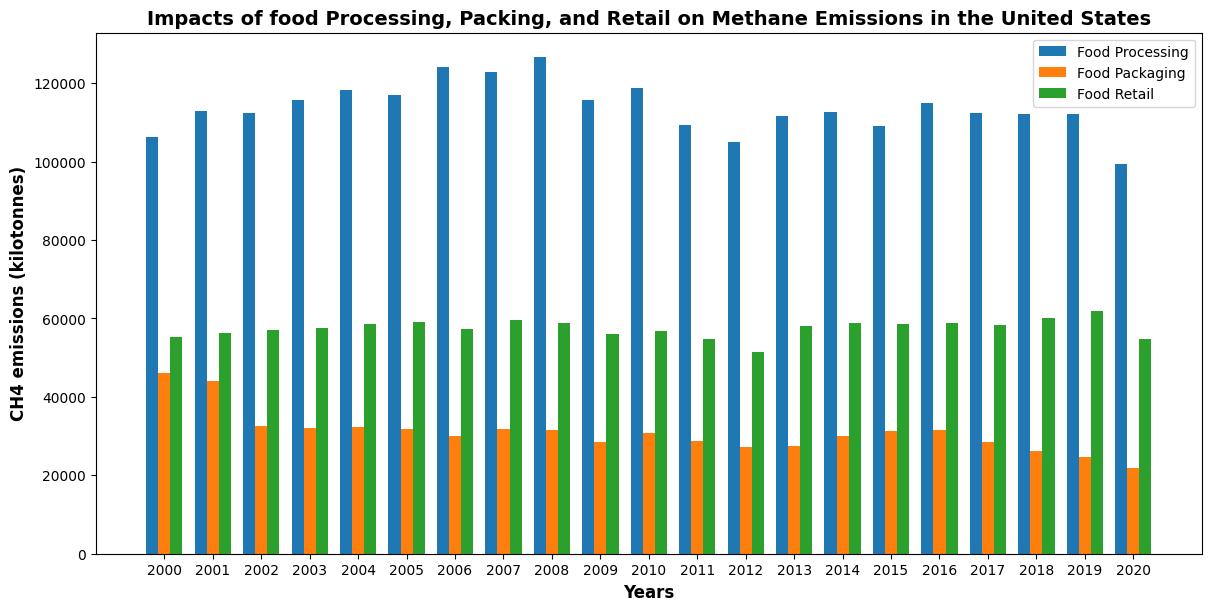

In [21]:
years = []

for j in range(2000, 2021):
    years.append(j)

table2 = dict()

items = [48007, 48013, 48019]

for k in items:
    
    CH4_emmisions = []
        
    for l in range(4, 25):
        CH4_emmisions.append(data.iloc[k][l])
        
        table2[data.iloc[k][1]] = CH4_emmisions

x = np.arange(len(years))  # the label locations
width = 0.25               # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in table2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.legend()
plt.rcParams["figure.figsize"] = [12, 6]
ax.set_xticks(x + width, years)
plt.title('Impacts of food Processing, Packing, and Retail on Methane Emissions in the United States', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.xlabel('Years', fontweight='bold', fontsize='12', horizontalalignment='center')
plt.ylabel('CH4 emissions (kilotonnes)', fontweight='bold', fontsize='12', horizontalalignment='center')

plt.show()

Hypothesis: The food processing industry in the United States has implemented various methane mitigation strategies over the past two decades, resulting in the stabilization of methane emissions despite continued growth in the industry.

The graph shows that methane emissions have not changed a significant amount from the year 2000 based on procedures in the food industry. It seems like the biggest change is in "Food Packaging," but the processing and packing of food have not drastically affected methane gas emission from the year 2000.

Plot 2

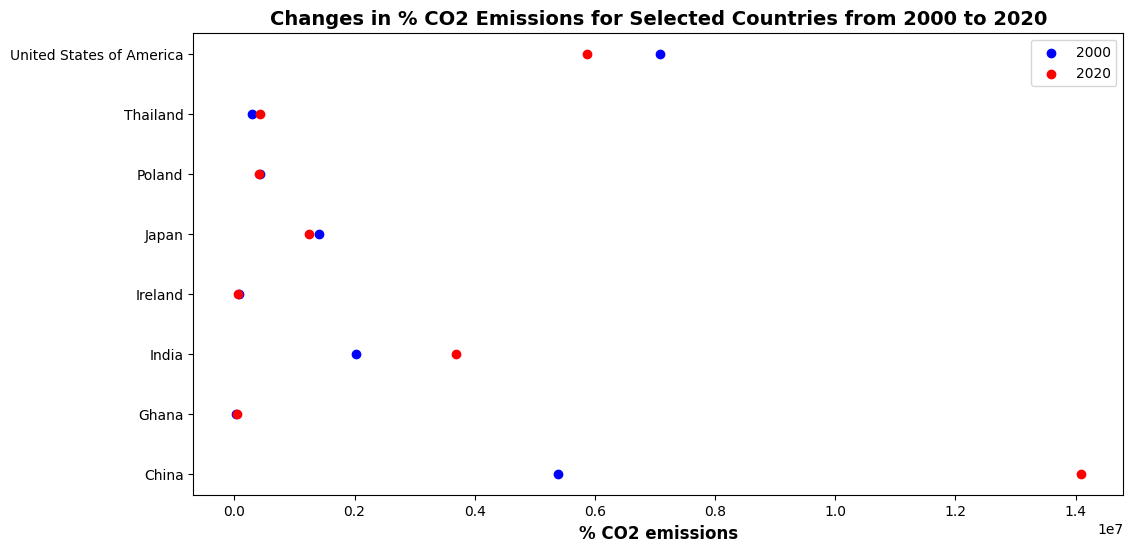

In [38]:
target = ['United States of America','Thailand', 'China', 'India', 'Ireland', 'Ghana', 'Japan', 'Poland']

table2000 = dict()

for k in range(58765):
    
    if data.iloc[k][0] in target and data.iloc[k][1] == 'All sectors without LULUCF' and data.iloc[k][2] == 'Emissions (CO2eq) (AR5)':
        
        table2000[data.iloc[k][0]] = data.iloc[k][4]   # 4 = 2000  

table2020 = dict()

for k in range(58765):
    
    if data.iloc[k][0] in target and data.iloc[k][1] == 'All sectors without LULUCF' and data.iloc[k][2] == 'Emissions (CO2eq) (AR5)':
        
        table2020[data.iloc[k][0]] = data.iloc[k][24]   # 24 = 2020

fig, ax = plt.subplots()
ax.scatter(table2000.values(), table2000.keys(), color='blue', label='2000')
ax.scatter(table2020.values(), table2020.keys(), color='red', label='2020')
ax.legend()
plt.title('Changes in % CO2 Emissions for Selected Countries from 2000 to 2020', fontweight='bold', fontsize='14')
plt.xlabel('% CO2 emissions', fontweight='bold', fontsize='12')
plt.show()

Hypothesis: Countries that have a larger population will have a larger increase in percent CO2 emission compared to less populated countries over time.

This plot supports this hypothesis for the most part because China, being the most populated country, has the biggest increase in percent CO2 emission from 2000 to 2020. This trend is then followed by India, and the United states, which is consistent with population size.

Plot 3

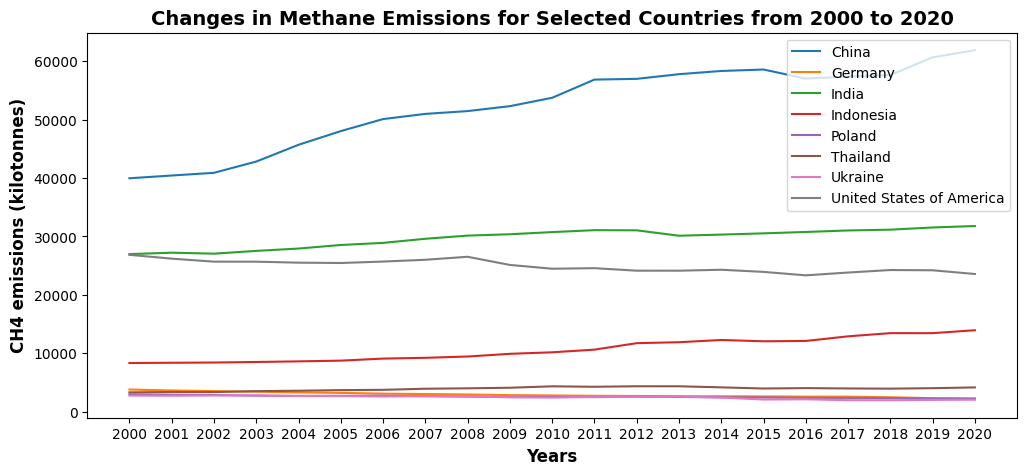

In [48]:
target = ['United States of America','Thailand', 'China', 'India', 'Germany', 'Indonesia', 'Ukraine', 'Poland']
years = []

for j in range(2000, 2021):
    years.append(j)

table1 = dict()

for k in range(58765):
    
    if data.iloc[k][0] in target and data.iloc[k][1] == 'All sectors without LULUCF' and data.iloc[k][2] == 'Emissions (CH4)':
        
        CH4_emmisions = []
        
        for l in range(4, 25):
            CH4_emmisions.append(data.iloc[k][l])
        
        table1[data.iloc[k][0]] = CH4_emmisions

fig, ax = plt.subplots()
default = range(len(years))

for m in table1.keys():
    ax.plot(default, table1[m], label=m)

ax.legend()
plt.xticks(default, years)
plt.rcParams["figure.figsize"] = [12, 5]

plt.title('Changes in Methane Emissions for Selected Countries from 2000 to 2020', fontweight='bold', fontsize='14')
plt.xlabel('Years', fontweight='bold', fontsize='12', horizontalalignment='center')
plt.ylabel('CH4 emissions (kilotonnes)', fontweight='bold', fontsize='12', horizontalalignment='center')

plt.show()

Hypothesis: The United States methane gas emissions will be lower compared to China because of the increase in regulations and policies for reducing green house gas emissions.

The hypothesis is supported by the data as China's methane emissions are rising at a considerably faster pace than those of the United States from the year 2000 to 2020.